#Day17. 통계분석기초

---



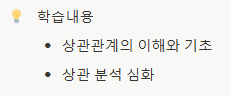

##**상관관계(Correlation) 이해와 기초**

###**1. 상관관계**

두 변수 간의 관계를 나타내는 통계적 개념  
한 변수의 변화가 다른 변수의 변화와 어떤 관계가 있는지를 나타냄  
즉, 한 변수가 증가할 때 다른 변수가 증가하거나 감소하는 패턴이 있는지를 분석하는 것

###**2. 상관계수 (Correlation Coefficient)**

상관관계의 정도는 상관계수(Correlation Coefficient, r)로 표현  
가장 많이 사용되는 상관계수는 피어슨 상관계수(Pearson Correlation Coefficient, r)  
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \cdot \sqrt{\sum (y_i - \bar{y})^2}}
$$

- $x_i, y_i$ : 각각의 데이터 값
- $\bar{x}, \bar{y}$ : 각각의 평균값
- $\sum (x_i - \bar{x})(y_i - \bar{y})$ : 공분산 (Covariance)
- $\sqrt{\sum (x_i - \bar{x})^2}$ : 의 표준편차
- $\sqrt{\sum (y_i - \bar{y})^2}$  : 의 표준편차

###**3. 상관계수의 해석**

- $r = 1$ → **완전한 양의 상관관계** (한 변수가 증가할 때 다른 변수도 완전히 비례하여 증가)
- $0.7 \leq r < 1$ → 강한 양의 상관관계
- $0.3\leq r < 0.7$ → 약한 양의 상관관계
- $r = 0$ → **상관관계 없음** (두 변수 간 관계가 없음)
- $−0.3 \leq r < 0.3$ → 약한 음의 상관관계
- $−0.7 \leq r < -0.3$ → 강한 음의 상관관계
- $r = -1$  → **완전한 음의 상관관계** (한 변수가 증가할 때 다른 변수는 완전히 반비례하여 감소)

###**4. 상관관계와 인과관계**

상관관계가 있다고 해서 반드시 인과관계(causation)가 있는 것은 아님  
즉, 두 변수가 함께 변한다고 해서 하나가 다른 하나의 원인이 된다는 의미는 아님

예를 들어:

- 아이스크림 판매량과 익사 사고 수는 높은 상관관계를 보이지만, 이는 **여름철이라는 공통 요인(Confounding Variable)** 때문
- 따라서 상관관계를 해석할 때는 반드시 **외부 요인과 논리적인 관계**를 고려해야 함

###**5. 상관분석의 응용**

- 경제학: 주식 시장에서 주가지수와 경제 지표 간 관계 분석
- 의학: 혈압과 심장 질환 간 관계 분석
- 마케팅: 광고 비용과 매출액 간 관계 분석
- 머신러닝: 독립 변수(특징)와 종속 변수 간 관계 파악

###**6. 상관계수의 한계**

- 상관계수는 선형 관계(linear relationship)만 측정  
즉, 비선형 관계(곡선 형태의 관계)는 측정하지 못할 수 있음
- 극단값(Outliers)에 민감하여 데이터에 이상치가 많으면 왜곡 가능
- 상관계수 값이 낮다고 해서 반드시 두 변수 간에 관계가 없는 것은 아님(비선형 관계 가능성)

###**7. 피어슨 상관계수 외의 다른 상관계수**

- **스피어만 상관계수(Spearman’s Rank Correlation, $\rho$)**: 순위(rank) 기반 상관계수로, 비선형 관계가 존재하는 경우에도 사용할 수 있음
- **켄달의 타우(Kendall’s Tau, $\tau$)**: 순위 기반으로 관계를 측정하며, 작은 데이터셋에서도 신뢰성이 높음

데이터를 이용하여 종속변수(매출)에 대한 독립변수를 상관계수를 기준으로 선택하는 예시.

| 광고비(만원) | 방문자 수 | 회원가입 수 | 구매 전환율(%) | 매출(만원) |
| --- | --- | --- | --- | --- |
| 50 | 500 | 50 | 2.5 | 300 |
| 60 | 600 | 65 | 3.0 | 350 |
| 55 | 550 | 55 | 2.8 | 330 |
| 70 | 700 | 75 | 3.2 | 370 |
| 80 | 800 | 85 | 3.5 | 400 |
| 90 | 900 | 95 | 3.8 | 450 |
| 85 | 850 | 90 | 3.6 | 420 |
| 100 | 1000 | 110 | 4.0 | 480 |
| 110 | 1100 | 120 | 4.2 | 500 |
| 120 | 1200 | 130 | 4.5 | 550 |

In [1]:
import pandas as pd

# 데이터 로드
data = {
    "광고비(만원)": [50, 60, 55, 70, 80, 90, 85, 100, 110, 120],
    "방문자 수": [500, 600, 550, 700, 800, 900, 850, 1000, 1100, 1200],
    "회원가입 수": [50, 65, 55, 75, 85, 95, 90, 110, 120, 130],
    "구매 전환율(%)": [2.5, 3.0, 2.8, 3.2, 3.5, 3.8, 3.6, 4.0, 4.2, 4.5],
    "매출(만원)": [300, 350, 330, 370, 400, 450, 420, 480, 500, 550],
}

df = pd.DataFrame(data)

# 종속변수 설정
target_variable = "매출(만원)"

# 상관계수 계산
correlation_matrix = df.corr()

# 종속변수와의 상관계수 추출 (자기 자신 제외)
independent_variables = correlation_matrix[target_variable].drop(target_variable).sort_values(ascending=False)

# 결과 출력
print("매출과의 상관계수:\n", independent_variables)

매출과의 상관계수:
 방문자 수        0.995633
광고비(만원)      0.995633
구매 전환율(%)    0.995208
회원가입 수       0.994387
Name: 매출(만원), dtype: float64




---

## **"1인가구관심집단.csv" 상관관계**

In [5]:
df_person = pd.read_csv('1인가구관심집단.csv', encoding='utf-8-sig')
display(df_person.head())
display(df_person.info())

,행정동코드,자치구,행정동명,성별,연령대,총인구,1인가구수,커뮤니케이션이_적은_집단,평일_외출이_적은_집단,휴일_외출이_적은_집단,출근소요시간_및_근무시간이_많은_집단,외출이_매우_적은_집단_전체,외출이_매우_많은_집단,동영상서비스_이용이_많은_집단,생활서비스_이용이_많은_집단,재정상태에_대한_관심집단,외출_커뮤니케이션이_모두_적은_집단_전체
0,1101053,종로구,사직동,1,20,220,68,14,7,4,6,4,5,10,3,4,2
1,1101053,종로구,사직동,1,25,321,107,16,12,5,14,5,12,11,22,16,5
2,1101053,종로구,사직동,1,30,351,107,19,16,12,12,12,19,17,12,15,8
3,1101053,종로구,사직동,1,35,353,105,22,13,7,11,11,17,16,9,7,9
4,1101053,종로구,사직동,1,40,419,79,18,7,11,6,12,11,12,6,6,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   행정동코드                   10176 non-null  int64 
 1   자치구                     10176 non-null  object
 2   행정동명                    10176 non-null  object
 3   성별                      10176 non-null  int64 
 4   연령대                     10176 non-null  int64 
 5   총인구                     10176 non-null  object
 6   1인가구수                   10176 non-null  object
 7   커뮤니케이션이_적은_집단           10176 non-null  int64 
 8   평일_외출이_적은_집단            10176 non-null  int64 
 9   휴일_외출이_적은_집단            10176 non-null  int64 
 10  출근소요시간_및_근무시간이_많은_집단    10176 non-null  int64 
 11  외출이_매우_적은_집단_전체         10176 non-null  int64 
 12  외출이_매우_많은_집단            10176 non-null  int64 
 13  동영상서비스_이용이_많은_집단        10176 non-null  int64 
 14  생활서비스_이용이_많은_집단         10176 non-null  int64 
 15  재정

None

###**"평일외출이 적은 집단"과 상관도 높은 컬럼 선별**

In [15]:
# 종속변수
target = "평일_외출이_적은_집단"

# 상관관계 계산
corr_matrix = df_person.corr(numeric_only=True)

# 종속변수와의 상관계수 추출
independent_var = corr_matrix[target].drop(target).sort_values(ascending=False)

# 결과 출력
display("평일 외출이 적은 집단과의 상관계수:", independent_var)

'평일 외출이 적은 집단과의 상관계수:'

,평일_외출이_적은_집단
출근소요시간_및_근무시간이_많은_집단,0.953097
동영상서비스_이용이_많은_집단,0.943168
커뮤니케이션이_적은_집단,0.888667
생활서비스_이용이_많은_집단,0.832320
재정상태에_대한_관심집단,0.804566
휴일_외출이_적은_집단,0.794170
외출_커뮤니케이션이_모두_적은_집단_전체,0.499605
외출이_매우_적은_집단_전체,0.478128
외출이_매우_많은_집단,0.419057
성별,0.028242


###**상관도 높은 순서에서 3개의 컬럼을 선정해 독립변수로 만들고 회귀식 산출**

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 26.3 MB/s eta 0:00:00


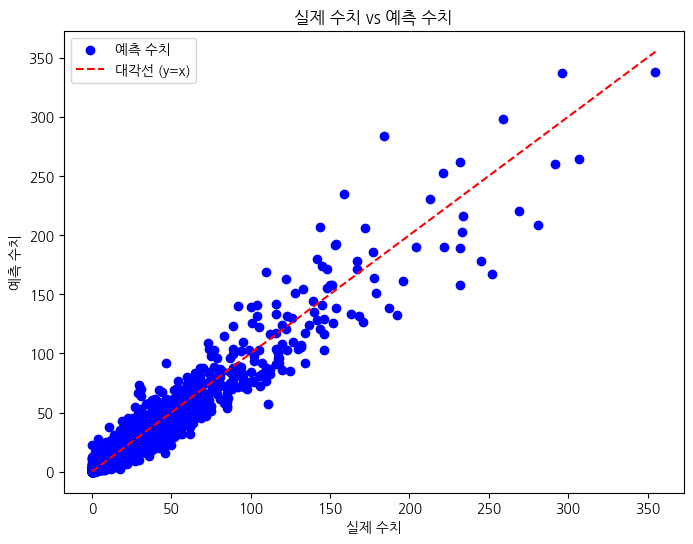

회귀식: 평일_외출이_적은_집단 = 0.00 + 0.61000 X 출근소요시간_및_근무시간이_많은_집단 +
 0.33000 X 동영상서비스_이용이_많은_집단 + 0.06000 X 커뮤니케이션이_적은_집단



{'회귀분석 결정 계수 (R^2)': 0.9206814208105261,
 '회귀 계수 목록': {'출근소요시간_및_근무시간이_많은_집단': 0.61,
  '동영상서비스_이용이_많은_집단': 0.33,
  '커뮤니케이션이_적은_집단': 0.06},
 '절편': 0.0031550232420514135}

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = df_person[["출근소요시간_및_근무시간이_많은_집단", "동영상서비스_이용이_많은_집단", "커뮤니케이션이_적은_집단"]]
y = df_person["평일_외출이_적은_집단"]

model = LinearRegression()
model.fit(x, y)

predicted_result = model.predict(x)
r2 = r2_score(y, predicted_result)

coef_dict = {column: coef for column, coef in zip(x.columns, np.round(model.coef_, 2))}

plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_result, color='blue', label='예측 수치')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='대각선 (y=x)')
plt.xlabel('실제 수치')
plt.ylabel('예측 수치')
plt.title('실제 수치 vs 예측 수치')
plt.legend()
plt.show()

results = {
    "회귀분석 결정 계수 (R^2)": r2,
    "회귀 계수 목록": coef_dict,
    "절편": model.intercept_
}

print("회귀식: 평일_외출이_적은_집단 = {:.2f} + {:.5f} X 출근소요시간_및_근무시간이_많은_집단 +\n {:.5f} X 동영상서비스_이용이_많은_집단 + {:.5f} X 커뮤니케이션이_적은_집단\n".format(
    model.intercept_, coef_dict["출근소요시간_및_근무시간이_많은_집단"], coef_dict["동영상서비스_이용이_많은_집단"], coef_dict["커뮤니케이션이_적은_집단"]
))

results

In [24]:
print("평일_외출이_적은_집단 (새 변수값) = {:.2f} + {:.3f} X 출근소요시간_및_근무시간이_많은_집단 +\n {:.3f} X 동영상서비스_이용이_많은_집단 + {:.3f} X 커뮤니케이션이_적은_집단\n= {:.2f}".format(
    model.intercept_, coef_dict["출근소요시간_및_근무시간이_많은_집단"], coef_dict["동영상서비스_이용이_많은_집단"], coef_dict["커뮤니케이션이_적은_집단"],
    model.intercept_ + coef_dict["출근소요시간_및_근무시간이_많은_집단"]*6 + coef_dict["동영상서비스_이용이_많은_집단"]*10 + coef_dict["커뮤니케이션이_적은_집단"]*14
))

평일_외출이_적은_집단 (새 변수값) = 0.00 + 0.610 X 출근소요시간_및_근무시간이_많은_집단 +
 0.330 X 동영상서비스_이용이_많은_집단 + 0.060 X 커뮤니케이션이_적은_집단
= 7.80




---

##**"서울시_상권분석서비스(추정매출-상권)_2022년.csv" 상관관계**

In [25]:
df_business = pd.read_csv("서울시_상권분석서비스(추정매출-상권)_2022년.csv", encoding='utf-8-sig')
display(df_business.head())
display(df_business.info())

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20221,D,발달상권,3120068,사가정역,CS200016,당구장,6207432.0,362,3619902.0,...,163,82,347,15,0,42,38,45,150,87
1,20221,A,골목상권,3110316,숭곡초등학교,CS300033,철물점,11755885.0,69,11755885.0,...,0,0,69,0,0,0,0,69,0,0
2,20221,R,전통시장,3130032,인현시장,CS200037,노래방,49610438.0,339,37313834.0,...,255,84,296,0,0,0,169,0,127,0
3,20221,D,발달상권,3120105,상수역(홍대),CS300001,슈퍼마켓,4091445.0,236,2589971.0,...,148,0,0,236,0,148,88,0,0,0
4,20221,A,골목상권,3110431,상계역,CS300001,슈퍼마켓,1828934.0,16,1828934.0,...,6,0,0,16,0,0,0,0,10,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   기준_년분기_코드        83573 non-null  int64  
 1   상권_구분_코드         83573 non-null  object 
 2   상권_구분_코드_명       83573 non-null  object 
 3   상권_코드            83573 non-null  int64  
 4   상권_코드_명          83573 non-null  object 
 5   서비스_업종_코드        83573 non-null  object 
 6   서비스_업종_코드_명      83573 non-null  object 
 7   당월_매출_금액         83573 non-null  float64
 8   당월_매출_건수         83573 non-null  int64  
 9   주중_매출_금액         83573 non-null  float64
 10  주말_매출_금액         83573 non-null  float64
 11  월요일_매출_금액        83573 non-null  float64
 12  화요일_매출_금액        83573 non-null  float64
 13  수요일_매출_금액        83573 non-null  float64
 14  목요일_매출_금액        83573 non-null  float64
 15  금요일_매출_금액        83573 non-null  float64
 16  토요일_매출_금액        83573 non-null  float64
 17  일요일_매출_금액   

None

###**"연령대_30_매출_금액"과 상관도 높은 컬럼**

In [28]:
# 종속변수
target = "연령대_30_매출_금액"

# 상관관계 계산
corr_matrix = df_business.corr(numeric_only=True)

# 종속변수와의 상관계수 추출
independent_var = corr_matrix[target].drop(target).sort_values(ascending=False)

# 결과 출력
display("30대 매출 금액과의 상관계수:", independent_var)

'30대 매출 금액과의 상관계수:'

,연령대_30_매출_금액
시간대_17~21_매출_금액,0.953612
주말_매출_금액,0.950246
여성_매출_금액,0.947024
일요일_매출_금액,0.943220
토요일_매출_금액,0.942880
남성_매출_금액,0.916886
당월_매출_금액,0.914663
연령대_20_매출_금액,0.911881
연령대_40_매출_금액,0.897745
연령대_50_매출_금액,0.892723


###**30대 매출금액 추정**

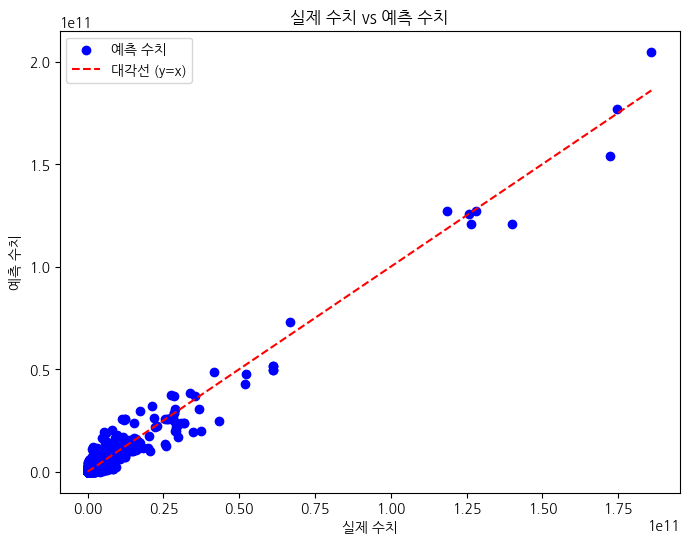

{'결정 계수(R^2)': 0.9543307945503188,
 '회귀 계수 목록': {'시간대_17~21_매출_금액': 0.24, '주말_매출_금액': 0.09, '여성_매출_금액': 0.22},
 '절편': -642027.6250971854}


회귀식: 연령대_30_매출_금액 = -642027.63 + 0.245 X 시간대_17~21_매출_금액 +
     0.091 X 주말_매출_금액 + 0.218 X 여성_매출_금액

실제값:  448104.0
예측값:  212804.71590358834


In [42]:
x = df_business[["시간대_17~21_매출_금액", "주말_매출_금액", "여성_매출_금액"]]
y = df_business["연령대_30_매출_금액"]

model2 = LinearRegression()
model2.fit(x, y)

predicted_result = model2.predict(x)
r2 = r2_score(y, predicted_result)

coef_dict = {column: coef for column, coef in zip(x.columns, np.round(model2.coef_, 2))}

plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_result, color='blue', label='예측 수치')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='대각선 (y=x)')
plt.xlabel('실제 수치')
plt.ylabel('예측 수치')
plt.title('실제 수치 vs 예측 수치')
plt.legend()
plt.show()

results = {
    "결정 계수(R^2)": r2,
    "회귀 계수 목록": coef_dict,
    "절편": model2.intercept_
}

display(results)

print("\n회귀식: 연령대_30_매출_금액 = {:.2f} + {:.3f} X 시간대_17~21_매출_금액 +\n     {:.3f} X 주말_매출_금액 + {:.3f} X 여성_매출_금액\n".format(
    model2.intercept_, model2.coef_[0], model2.coef_[1], model2.coef_[2]
))

# 예측값 (첫번째 행 값)
pred = model2.intercept_ + model2.coef_[0] * 2196006 + model2.coef_[1] * 2587530 + model2.coef_[2] * 377191
print("실제값: ", df_business["연령대_30_매출_금액"][0])
print("예측값: ", pred)

- **결정계수(0.95) 높지만 예측값이 다소 부정확함**
- **변수를 재설정해야 할 것으로 판단됨**

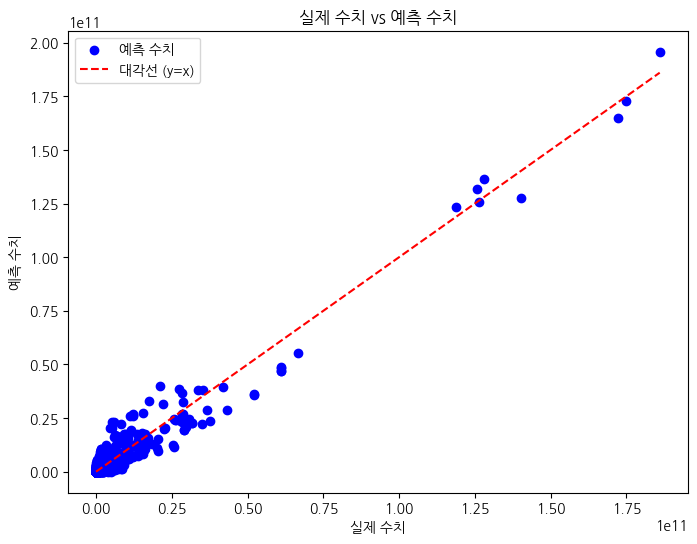

{'결정 계수(R^2)': 0.9453615052249223,
 '회귀 계수 목록': {'주말_매출_금액': 0.26, '여성_매출_금액': 0.24, '토요일_매출_금액': -0.01},
 '절편': 17638055.63565427}


회귀식: 연령대_30_매출_금액 = 17638055.64 + 0.245 X 주말_매출_금액 + 0.091 X 여성_매출_금액 + 0.218 X 토요일_매출_금액

실제값:  67360904.0
예측값:  64139902.85018678


In [47]:
# 변수 재설정
x = df_business[["주말_매출_금액", "여성_매출_금액", "토요일_매출_금액"]]
y = df_business["연령대_30_매출_금액"]

model3 = LinearRegression()
model3.fit(x, y)

predicted_result = model3.predict(x)
r2 = r2_score(y, predicted_result)

coef_dict = {column: coef for column, coef in zip(x.columns, np.round(model3.coef_, 2))}

plt.figure(figsize=(8, 6))
plt.scatter(y, predicted_result, color='blue', label='예측 수치')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='대각선 (y=x)')
plt.xlabel('실제 수치')
plt.ylabel('예측 수치')
plt.title('실제 수치 vs 예측 수치')
plt.legend()
plt.show()

results = {
    "결정 계수(R^2)": r2,
    "회귀 계수 목록": coef_dict,
    "절편": model3.intercept_
}

display(results)

print("\n회귀식: 연령대_30_매출_금액 = {:.2f} + {:.3f} X 주말_매출_금액 + {:.3f} X 여성_매출_금액 + {:.3f} X 토요일_매출_금액\n".format(
    model3.intercept_, model2.coef_[0], model2.coef_[1], model2.coef_[2]
))

# 예측값 (24번째 레코드 값)
pred = model3.intercept_ + model3.coef_[0] * 116220845 + model3.coef_[1] * 70936562 + model3.coef_[2] * 56745745
print("실제값: ", df_business["연령대_30_매출_금액"][23])
print("예측값: ", pred)


- **정확도 높아짐 !**



---

##**그로스마케팅에서 상관관계의 응용**

### **1. 시나리오: 광고 지출과 매출 간의 관계 분석**

한 e커머스 기업이 광고비 지출이 매출에 어떤 영향을 미치는지 분석하려 합니다. 특정 광고 채널(예: Google Ads)에서 매일 일정 금액을 투자했을 때, 그날의 매출과 상관관계를 분석하여 광고 예산을 최적화하는 것이 목표입니다. 이를 통해 광고비 지출 대비 ROI(Return on Investment)를 예측하고 최적의 광고비를 설정할 수 있습니다

아래는 10일간의 광고비 지출(단위: 만원)과 일별 매출(단위: 만원) 데이터입니다.  

| 날짜 | 광고비 (만원) | 매출 (만원) |
| --- | --- | --- |
| 2024-02-01 | 50 | 300 |
| 2024-02-02 | 60 | 350 |
| 2024-02-03 | 55 | 320 |
| 2024-02-04 | 70 | 400 |
| 2024-02-05 | 65 | 390 |
| 2024-02-06 | 80 | 450 |
| 2024-02-07 | 75 | 420 |
| 2024-02-08 | 90 | 500 |
| 2024-02-09 | 85 | 470 |
| 2024-02-10 | 100 | 550 |

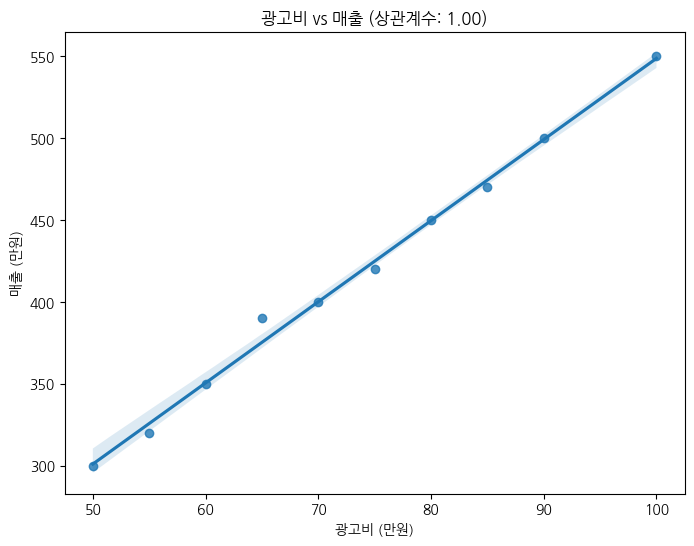

Pearson 상관계수: 1.00

ROI 데이터:


,날짜,광고비,매출,ROI
0,2024-02-01,50,300,500.000000
1,2024-02-02,60,350,483.333333
2,2024-02-03,55,320,481.818182
3,2024-02-04,70,400,471.428571
4,2024-02-05,65,390,500.000000
5,2024-02-06,80,450,462.500000
6,2024-02-07,75,420,460.000000
7,2024-02-08,90,500,455.555556
8,2024-02-09,85,470,452.941176
9,2024-02-10,100,550,450.000000


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 데이터 생성
data = {
    "날짜": pd.date_range(start="2024-02-01", periods=10, freq="D"),
    "광고비": [50, 60, 55, 70, 65, 80, 75, 90, 85, 100],
    "매출": [300, 350, 320, 400, 390, 450, 420, 500, 470, 550]
}

df = pd.DataFrame(data)

# 상관계수 계산
correlation, p_value = pearsonr(df["광고비"], df["매출"])

# 데이터 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="광고비", y="매출", data=df)
plt.title(f"광고비 vs 매출 (상관계수: {correlation:.2f})")
plt.xlabel("광고비 (만원)")
plt.ylabel("매출 (만원)")
plt.show()

# 상관계수 출력
print(f"Pearson 상관계수: {correlation:.2f}")

# ROI(투자수익률) 계산
df["ROI"] = (df["매출"] - df["광고비"]) / df["광고비"] * 100
print("\nROI 데이터:")
display(df[["날짜", "광고비", "매출", "ROI"]])

### **실행 결과**

1. **상관계수(Pearson Correlation Coefficient) 출력**
    - 예를 들어, 광고비와 매출 간의 상관계수가 **0.95**라면 매우 강한 양의 상관관계가 있음을 의미합니다.
    - 즉, 광고비가 증가할수록 매출도 함께 증가하는 경향이 있다는 것을 의미합니다.
2. **시각화 그래프**
    - `regplot()`을 통해 광고비와 매출의 관계를 산점도(Scatter Plot) 및 회귀선(Regression Line)으로 나타냅니다.
    - 점들이 직선에 가깝게 몰려 있으면 강한 상관관계를 의미합니다.
3. **ROI(투자수익률) 계산**
    - ROI = `(매출 - 광고비) / 광고비 × 100`
    - 예를 들어, 광고비 50만원에 매출이 300만원이면 ROI = `(300-50)/50 × 100 = 500%`

### **결론**

- 만약 광고비와 매출 간의 상관계수가 **높다면**, 광고비를 늘릴수록 매출이 증가하는 경향이 있으므로 광고 예산을 적극적으로 투자할 수 있습니다.
- 반대로, 상관관계가 **낮다면**, 광고비를 줄이거나 다른 마케팅 전략(e.g., SEO, SNS 마케팅)을 검토해야 합니다.
- **ROI 데이터**를 추가로 분석하면, 특정 광고비 구간에서 가장 효율적인 투자 지점을 찾을 수 있습니다.



---

### **2. 시나리오: 이메일 캠페인 오픈율과 구매 전환율의 관계 분석**

한 e커머스 기업이 이메일 마케팅을 통해 고객들에게 할인 쿠폰과 신상품 정보를 제공하고 있습니다.

그러나 이메일을 많이 발송해도 실제 구매로 이어지는지 확신할 수 없습니다. 따라서 이메일 오픈율과 구매 전환율 간의 상관관계를 분석하여, 이메일 캠페인의 효과를 검증하고 최적의 마케팅 전략을 수립하려 합니다.

아래는 10일 동안의 이메일 오픈율(%)과 구매 전환율(%) 데이터입니다.  

| 날짜 | 이메일 오픈율 (%) | 구매 전환율 (%) |
| --- | --- | --- |
| 2024-02-01 | 15 | 2.5 |
| 2024-02-02 | 18 | 3.0 |
| 2024-02-03 | 20 | 3.8 |
| 2024-02-04 | 22 | 4.1 |
| 2024-02-05 | 25 | 4.8 |
| 2024-02-06 | 30 | 5.5 |
| 2024-02-07 | 28 | 5.2 |
| 2024-02-08 | 35 | 6.5 |
| 2024-02-09 | 38 | 7.0 |
| 2024-02-10 | 40 | 7.5 |

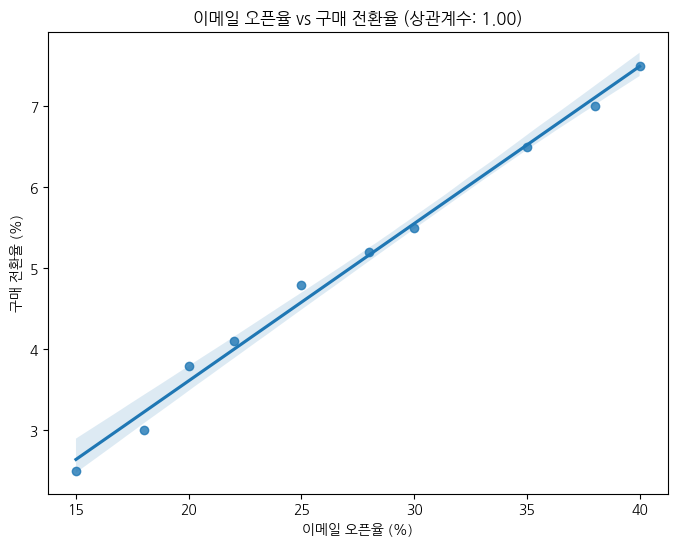

Pearson 상관계수: 1.00
P-value: 0.0000

ROI 데이터:


,날짜,이메일 오픈율,구매 전환율,ROI
0,2024-02-01,15,2.5,16.666667
1,2024-02-02,18,3.0,16.666667
2,2024-02-03,20,3.8,19.000000
3,2024-02-04,22,4.1,18.636364
4,2024-02-05,25,4.8,19.200000
5,2024-02-06,30,5.5,18.333333
6,2024-02-07,28,5.2,18.571429
7,2024-02-08,35,6.5,18.571429
8,2024-02-09,38,7.0,18.421053
9,2024-02-10,40,7.5,18.750000


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 데이터 생성
data = {
    "날짜": pd.date_range(start="2024-02-01", periods=10, freq="D"),
    "이메일 오픈율": [15, 18, 20, 22, 25, 30, 28, 35, 38, 40],
    "구매 전환율": [2.5, 3.0, 3.8, 4.1, 4.8, 5.5, 5.2, 6.5, 7.0, 7.5]
}

df = pd.DataFrame(data)

# 상관계수 계산
correlation, p_value = pearsonr(df["이메일 오픈율"], df["구매 전환율"])

# 데이터 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="이메일 오픈율", y="구매 전환율", data=df)
plt.title(f"이메일 오픈율 vs 구매 전환율 (상관계수: {correlation:.2f})")
plt.xlabel("이메일 오픈율 (%)")
plt.ylabel("구매 전환율 (%)")
plt.show()

# 상관계수 출력
print(f"Pearson 상관계수: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# ROI(이메일 캠페인 효과 분석) 계산
df["ROI"] = df["구매 전환율"] / df["이메일 오픈율"] * 100
print("\nROI 데이터:")
display(df[["날짜", "이메일 오픈율", "구매 전환율", "ROI"]])

### **실행 결과**

1. **상관계수(Pearson Correlation Coefficient) 출력**
    - 예를 들어, 이메일 오픈율과 구매 전환율 간의 상관계수가 **1.00**이므로 강한 양의 상관관계가 있음을 의미합니다.
    - 즉, 이메일을 더 많이 열어볼수록 구매 가능성이 높아지는 경향이 있다는 것을 시사합니다.
2. **시각화 그래프**
    - 이메일 오픈율과 구매 전환율의 관계를 산점도(Scatter Plot) 및 회귀선(Regression Line)으로 시각화.
    - 점들이 회귀선에 가깝게 몰려 있으면 강한 상관관계를 의미.
3. **ROI(이메일 캠페인 효과 분석)**
    - ROI = `(구매 전환율 / 이메일 오픈율) × 100`
    - 예를 들어, 이메일 오픈율이 15%이고 구매 전환율이 2.5%라면 ROI = `(2.5 / 15) × 100 = 16.7%`
    - ROI가 높은 날을 분석하면, 어떤 요인이 효과적인지 알 수 있음.

### **결론**

- 이메일 오픈율과 구매 전환율 간의 **강한 양의 상관관계**가 발견되었다면, 이메일 마케팅을 강화할 필요가 있음.
- 반대로 상관관계가 **낮다면**, 이메일 콘텐츠 개선, 고객 세분화(Segmentation), A/B 테스트를 진행하여 전략을 보완해야 함.
- ROI 분석을 통해 **어떤 캠페인이 효과적인지 파악**하고, 가장 높은 성과를 내는 이메일 형식을 최적화할 수 있음.



---

### **3. 시나리오: 제품 할인율과 판매량 간의 관계 분석**

한 온라인 쇼핑몰에서는 특정 제품의 할인율이 판매량 증가에 미치는 영향을 분석하려 합니다.

소비자들은 높은 할인율에 반응하여 더 많은 제품을 구매할 가능성이 있습니다. 따라서 할인율과 판매량 간의 상관관계를 분석하여 최적의 할인율을 결정하고, 매출을 극대화하는 전략을 수립하려 합니다.

아래는 10일 동안의 제품 할인율(%)과 판매량(개) 데이터입니다.  

| 날짜 | 할인율 (%) | 판매량 (개) |
| --- | --- | --- |
| 2024-02-01 | 5 | 120 |
| 2024-02-02 | 10 | 150 |
| 2024-02-03 | 8 | 135 |
| 2024-02-04 | 15 | 200 |
| 2024-02-05 | 12 | 180 |
| 2024-02-06 | 18 | 230 |
| 2024-02-07 | 20 | 250 |
| 2024-02-08 | 25 | 300 |
| 2024-02-09 | 22 | 270 |
| 2024-02-10 | 30 | 350 |

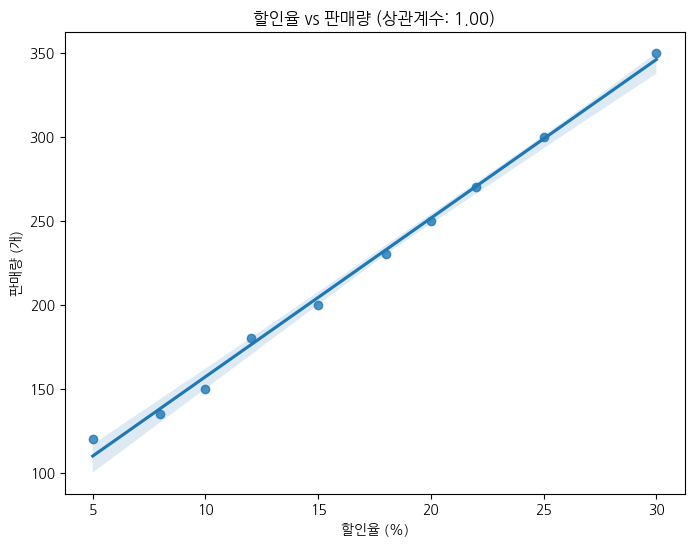

Pearson 상관계수: 1.00
P-value: 0.0000

판매량 증가율 데이터:


,날짜,할인율,판매량,판매량 증가율
0,2024-02-01,5,120,NaN
1,2024-02-02,10,150,25.000000
2,2024-02-03,8,135,-10.000000
3,2024-02-04,15,200,48.148148
4,2024-02-05,12,180,-10.000000
5,2024-02-06,18,230,27.777778
6,2024-02-07,20,250,8.695652
7,2024-02-08,25,300,20.000000
8,2024-02-09,22,270,-10.000000
9,2024-02-10,30,350,29.629630


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 데이터 생성
data = {
    "날짜": pd.date_range(start="2024-02-01", periods=10, freq="D"),
    "할인율": [5, 10, 8, 15, 12, 18, 20, 25, 22, 30],
    "판매량": [120, 150, 135, 200, 180, 230, 250, 300, 270, 350]
}

df = pd.DataFrame(data)

# 상관계수 계산
correlation, p_value = pearsonr(df["할인율"], df["판매량"])

# 데이터 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="할인율", y="판매량", data=df)
plt.title(f"할인율 vs 판매량 (상관계수: {correlation:.2f})")
plt.xlabel("할인율 (%)")
plt.ylabel("판매량 (개)")
plt.show()

# 상관계수 출력
print(f"Pearson 상관계수: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# 할인율별 판매량 증가율 계산
df["판매량 증가율"] = df["판매량"].pct_change() * 100
print("\n판매량 증가율 데이터:")
display(df[["날짜", "할인율", "판매량", "판매량 증가율"]])

### **실행 결과**

1. **상관계수(Pearson Correlation Coefficient) 출력**
    - 예를 들어, 할인율과 판매량 간의 상관계수가 **1.00**이므로 강한 양의 상관관계가 있음을 의미합니다.
    - 즉, 할인율이 높아질수록 판매량이 증가하는 경향이 있음을 확인할 수 있습니다.
2. **시각화 그래프**
    - 할인율과 판매량의 관계를 산점도(Scatter Plot) 및 회귀선(Regression Line)으로 시각화.
    - 데이터가 직선에 가까울수록 강한 상관관계를 의미.
3. **판매량 증가율 분석**
    - `판매량 증가율` = `(현재 판매량 - 이전 판매량) / 이전 판매량 × 100`
    - 예를 들어, 할인율이 10%에서 15%로 증가할 때 판매량이 **150개 → 200개**로 증가했다면 증가율은 **33.3%**.



---

### **4. 시나리오: 고객 리뷰 수와 매출 간의 관계 분석**

한 e커머스 플랫폼에서는 고객 리뷰가 제품 판매에 미치는 영향을 분석하고자 합니다. 제품의 리뷰 개수가 많을수록 소비자 신뢰도가 올라가고, 구매 가능성이 증가할 수 있습니다. 따라서 리뷰 개수와 매출 간의 상관관계를 분석하여 리뷰 관리 전략을 수립하려 합니다.

아래는 10개 제품의 리뷰 개수, 평균 평점(5점 만점), 매출(만원) 데이터입니다.  

| 제품 ID | 리뷰 개수 | 평균 평점 | 매출 (만원) |
| --- | --- | --- | --- |
| P001 | 120 | 4.5 | 500 |
| P002 | 200 | 4.7 | 800 |
| P003 | 150 | 4.2 | 600 |
| P004 | 90 | 4.1 | 450 |
| P005 | 250 | 4.8 | 950 |
| P006 | 300 | 4.9 | 1200 |
| P007 | 180 | 4.6 | 700 |
| P008 | 75 | 4.0 | 400 |
| P009 | 220 | 4.3 | 850 |
| P010 | 50 | 3.8 | 300 |

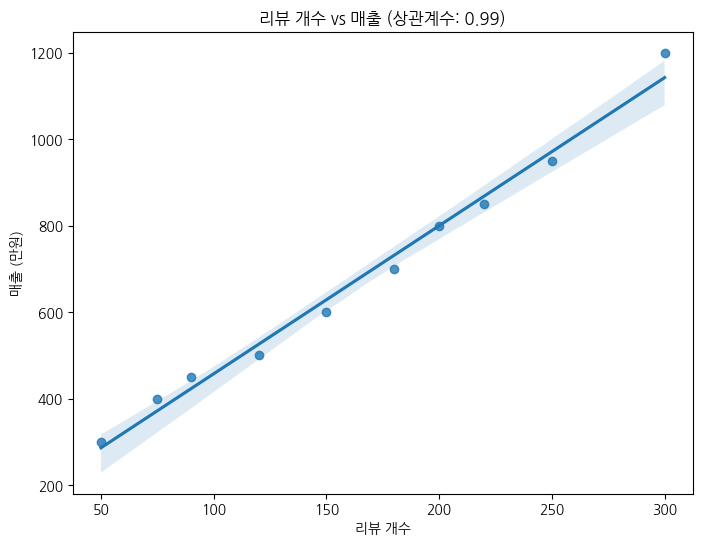

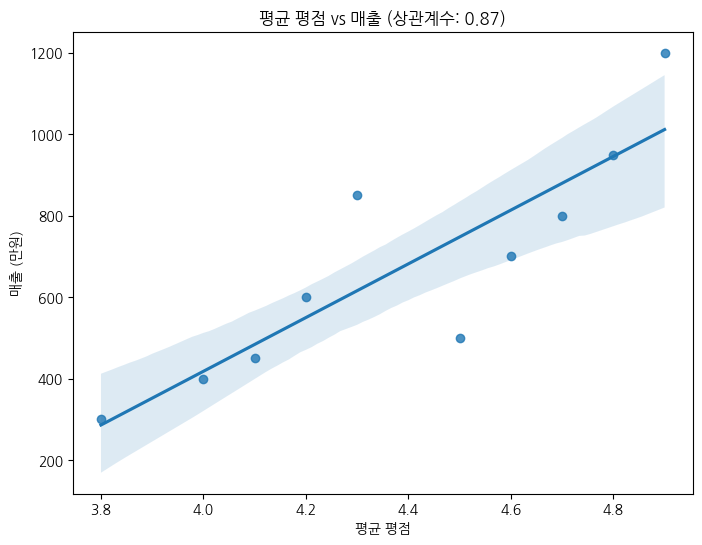

리뷰 개수 vs 매출 Pearson 상관계수: 0.99, P-value: 0.0000
평균 평점 vs 매출 Pearson 상관계수: 0.87, P-value: 0.0012

리뷰당 매출 기여도 데이터:


,제품 ID,리뷰 개수,매출,리뷰당 매출 기여도
0,P001,120,500,4.166667
1,P002,200,800,4.000000
2,P003,150,600,4.000000
3,P004,90,450,5.000000
4,P005,250,950,3.800000
5,P006,300,1200,4.000000
6,P007,180,700,3.888889
7,P008,75,400,5.333333
8,P009,220,850,3.863636
9,P010,50,300,6.000000


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 데이터 생성
data = {
    "제품 ID": ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010"],
    "리뷰 개수": [120, 200, 150, 90, 250, 300, 180, 75, 220, 50],
    "평균 평점": [4.5, 4.7, 4.2, 4.1, 4.8, 4.9, 4.6, 4.0, 4.3, 3.8],
    "매출": [500, 800, 600, 450, 950, 1200, 700, 400, 850, 300]
}

df = pd.DataFrame(data)

# 상관계수 계산
correlation_reviews, p_value_reviews = pearsonr(df["리뷰 개수"], df["매출"])
correlation_rating, p_value_rating = pearsonr(df["평균 평점"], df["매출"])

# 데이터 시각화 (리뷰 개수 vs 매출)
plt.figure(figsize=(8, 6))
sns.regplot(x="리뷰 개수", y="매출", data=df)
plt.title(f"리뷰 개수 vs 매출 (상관계수: {correlation_reviews:.2f})")
plt.xlabel("리뷰 개수")
plt.ylabel("매출 (만원)")
plt.show()

# 데이터 시각화 (평균 평점 vs 매출)
plt.figure(figsize=(8, 6))
sns.regplot(x="평균 평점", y="매출", data=df)
plt.title(f"평균 평점 vs 매출 (상관계수: {correlation_rating:.2f})")
plt.xlabel("평균 평점")
plt.ylabel("매출 (만원)")
plt.show()

# 상관계수 출력
print(f"리뷰 개수 vs 매출 Pearson 상관계수: {correlation_reviews:.2f}, P-value: {p_value_reviews:.4f}")
print(f"평균 평점 vs 매출 Pearson 상관계수: {correlation_rating:.2f}, P-value: {p_value_rating:.4f}")

# 리뷰 효과 분석
df["리뷰당 매출 기여도"] = df["매출"] / df["리뷰 개수"]
print("\n리뷰당 매출 기여도 데이터:")
display(df[["제품 ID", "리뷰 개수", "매출", "리뷰당 매출 기여도"]])

### **실행 결과**

1. **상관계수(Pearson Correlation Coefficient) 출력**
    - `리뷰 개수 vs 매출` 상관계수 예제 값: **0.99** → 강한 양의 상관관계.
    - `평균 평점 vs 매출` 상관계수 예제 값: **0.87** → 비교적 강한 양의 상관관계.
    - 즉, 리뷰 개수가 많을수록 매출이 증가하는 경향이 더 뚜렷함.
2. **시각화 그래프**
    - 리뷰 개수와 매출, 평균 평점과 매출의 관계를 각각 산점도 및 회귀선으로 시각화.
    - 데이터 점들이 직선에 가깝다면 강한 상관관계를 의미.
3. **리뷰당 매출 기여도 분석**
    - `리뷰당 매출 기여도` = `매출 / 리뷰 개수`
    - 예를 들어, 리뷰 개수가 200개이고 매출이 800만원이면 `800 / 200 = 4만원`
    - 이를 통해 제품별 리뷰 효과를 측정하고, 마케팅 전략을 최적화할 수 있음.

### **결론**

- **리뷰 개수와 매출 간 강한 상관관계가 발견되었다면**, 더 많은 리뷰를 확보하는 것이 중요함.
- **평균 평점도 중요한 요소이지만**, 리뷰 개수 증가가 매출에 더 큰 영향을 줄 수 있음.
- **리뷰당 매출 기여도 분석**을 통해, 리뷰 유도 캠페인을 전략적으로 운영할 수 있음.



---



### **1. 문제 정의**

한 온라인 쇼핑몰은 `광고비`, `웹사이트 방문자 수`, `장바구니 담기 횟수`, 그리고 `최종 매출` 간의 관계를 분석하고자 합니다. 마케팅팀은 **광고비 증가가 실제 매출 증가로 이어지는지** 궁금하며, **웹사이트 방문자 수와 장바구니 추가 횟수가 구매로 전환되는지** 확인하려 합니다.

### **목표:**

1. 광고비, 방문자 수, 장바구니 담기 횟수가 매출에 미치는 영향을 분석.
2. 주요 마케팅 요소 간 상관관계를 분석하여 매출을 높이기 위한 최적의 전략 수립.

10일간의 광고비, 웹사이트 방문자 수, 장바구니 추가 횟수, 매출 데이터를 사용합니다.

| 날짜 | 광고비 (만원) | 방문자 수 | 장바구니 추가 횟수 | 매출 (만원) |
| --- | --- | --- | --- | --- |
| 2024-02-01 | 50 | 1200 | 150 | 300 |
| 2024-02-02 | 60 | 1350 | 180 | 350 |
| 2024-02-03 | 55 | 1250 | 160 | 320 |
| 2024-02-04 | 70 | 1500 | 210 | 400 |
| 2024-02-05 | 65 | 1450 | 200 | 390 |
| 2024-02-06 | 80 | 1600 | 230 | 450 |
| 2024-02-07 | 75 | 1550 | 220 | 420 |
| 2024-02-08 | 90 | 1800 | 270 | 500 |
| 2024-02-09 | 85 | 1750 | 260 | 470 |
| 2024-02-10 | 100 | 2000 | 300 | 550 |

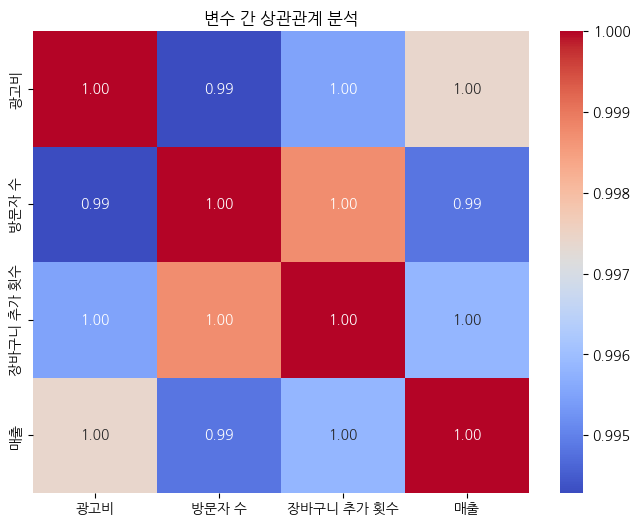

광고비 vs 매출 Pearson 상관계수: 1.00, P-value: 0.0000
방문자 수 vs 매출 Pearson 상관계수: 0.99, P-value: 0.0000
장바구니 추가 횟수 vs 매출 Pearson 상관계수: 1.00, P-value: 0.0000


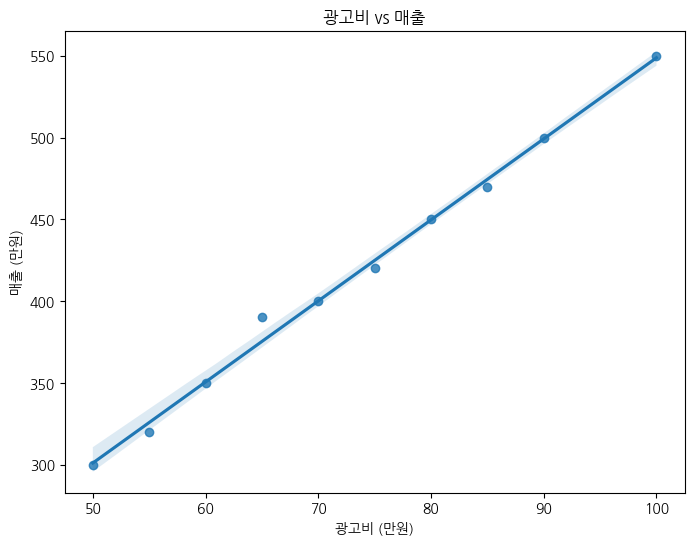

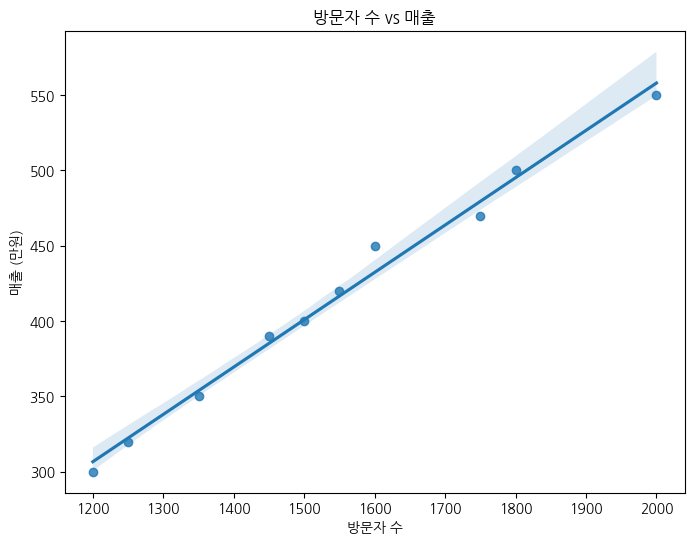

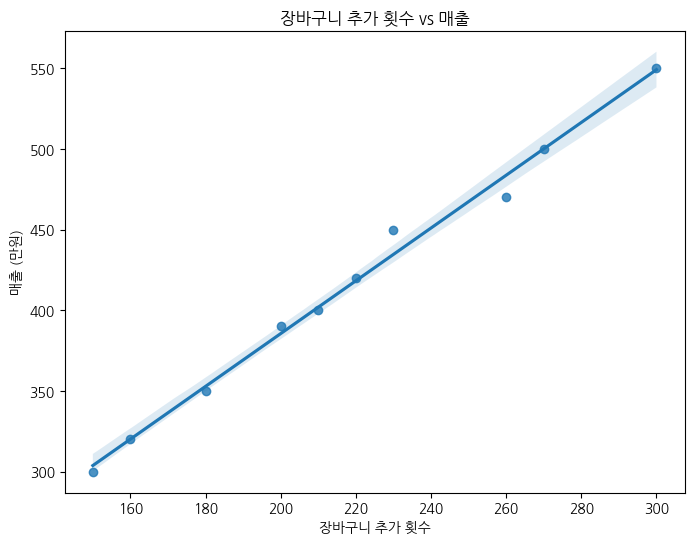

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 데이터 생성
data = {
    "날짜": pd.date_range(start="2024-02-01", periods=10, freq="D"),
    "광고비": [50, 60, 55, 70, 65, 80, 75, 90, 85, 100],
    "방문자 수": [1200, 1350, 1250, 1500, 1450, 1600, 1550, 1800, 1750, 2000],
    "장바구니 추가 횟수": [150, 180, 160, 210, 200, 230, 220, 270, 260, 300],
    "매출": [300, 350, 320, 400, 390, 450, 420, 500, 470, 550]
}

df = pd.DataFrame(data)

# 상관계수 계산
corr_matrix = df.drop(columns=["날짜"]).corr()

# 데이터 시각화 - 상관행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("변수 간 상관관계 분석")
plt.show()

# 변수별 상관계수 출력
for col in ["광고비", "방문자 수", "장바구니 추가 횟수"]:
    corr, p_value = pearsonr(df[col], df["매출"])
    print(f"{col} vs 매출 Pearson 상관계수: {corr:.2f}, P-value: {p_value:.4f}")

# 광고비 vs 매출 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="광고비", y="매출", data=df)
plt.title("광고비 vs 매출")
plt.xlabel("광고비 (만원)")
plt.ylabel("매출 (만원)")
plt.show()

# 방문자 수 vs 매출 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="방문자 수", y="매출", data=df)
plt.title("방문자 수 vs 매출")
plt.xlabel("방문자 수")
plt.ylabel("매출 (만원)")
plt.show()

# 장바구니 추가 횟수 vs 매출 시각화
plt.figure(figsize=(8, 6))
sns.regplot(x="장바구니 추가 횟수", y="매출", data=df)
plt.title("장바구니 추가 횟수 vs 매출")
plt.xlabel("장바구니 추가 횟수")
plt.ylabel("매출 (만원)")
plt.show()



---



## **웹시스템을 이용한 마케팅데이터 획득에 대한 이해**

**기능 개요:**
1. 웹페이지에서 사용자가 광고를 클릭할 때마다 클릭 데이터를 저장합니다.
2. MySQL(MariaDB)에서 **광고 노출수(views) 및 클릭수(clicks)** 를 저장하고, **CTR(클릭률) 계산**을 수행합니다.
3. Flask를 이용해 데이터 수집 및 CTR 결과를 API로 제공하며, HTML/JS를 이용해 실시간으로 CTR을 표시합니다.

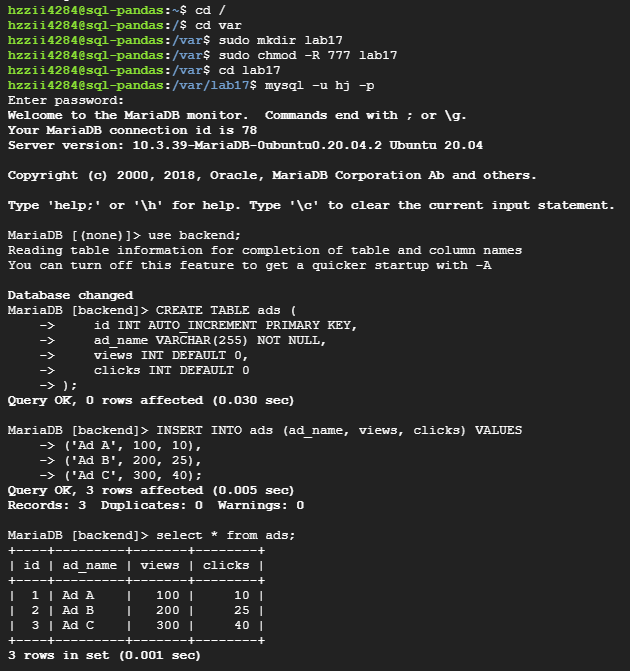

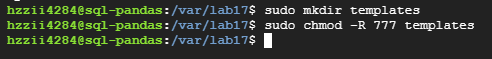

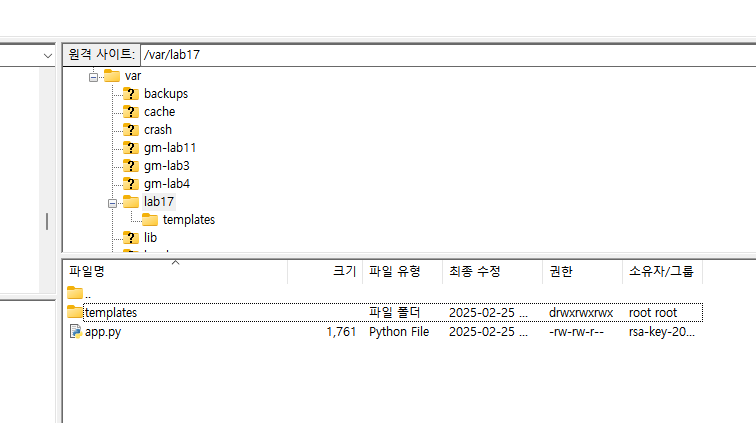

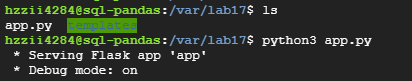

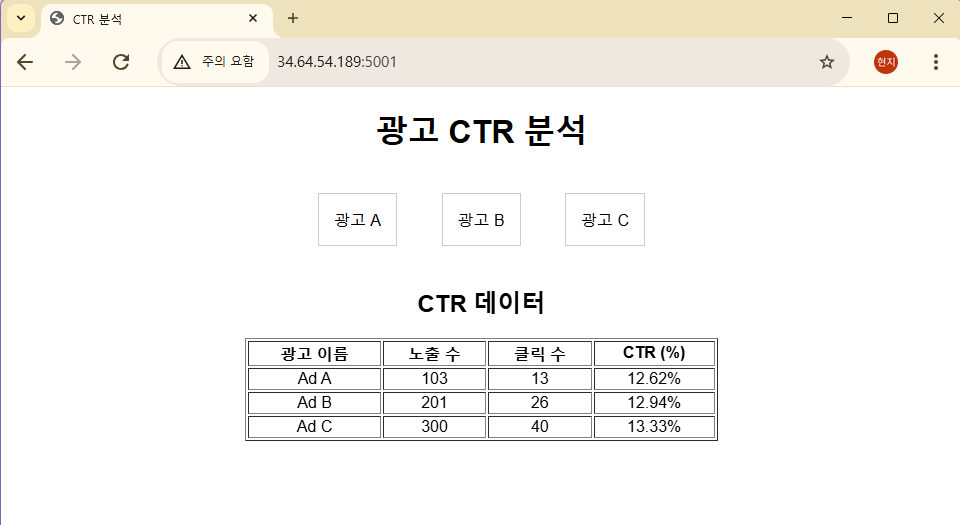

---

## **상관분석과 회귀분석을 활용한 배달 서비스 이용 예측**

In [92]:
df_service = pd.read_csv('2024.12월_29개_통신정보.csv', encoding='utf-8-sig')
display(df_service)

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,야간상주지 변경 미추정 인구 수,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 25%",...,배달_브랜드 서비스 사용 미추정 인구수,배달_브랜드 서비스 사용일수,"배달_브랜드 서비스 사용일수: 4분위수, 25%","배달_브랜드 서비스 사용일수: 4분위수, 50%","배달_브랜드 서비스 사용일수: 4분위수, 75%",배달_식재료 서비스 사용 미추정 인구수,배달_식재료 서비스 사용일수,"배달_식재료 서비스 사용일수: 4분위수, 25%","배달_식재료 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 75%"
0,1101053,종로구,사직동,1,20,182,57,0,2.4,1,...,148,2.5,1.7,1.7,3.3,180,1.7,1.7,1.7,1.7
1,1101053,종로구,사직동,1,25,286,94,0,2.1,1,...,220,2.5,1.7,1.7,3.3,286,0.0,0.0,0.0,0.0
2,1101053,종로구,사직동,1,30,444,146,0,1.9,1,...,368,3.3,1.7,1.7,5.0,438,1.7,1.7,1.7,1.7
3,1101053,종로구,사직동,1,35,426,128,0,1.8,1,...,354,2.6,1.7,1.7,3.3,420,1.7,1.7,1.7,1.7
4,1101053,종로구,사직동,1,40,510,120,0,1.6,1,...,452,3.1,1.7,1.7,5.0,494,1.7,1.7,1.7,1.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,1125074,강동구,길동,2,55,"1,850",235,0,1.6,1,...,1677,2.9,1.7,1.7,3.3,1798,1.7,1.7,1.7,1.7
10172,1125074,강동구,길동,2,60,"2,061",281,0,1.5,1,...,1953,3.0,1.7,1.7,3.3,2043,1.7,1.7,1.7,1.7
10173,1125074,강동구,길동,2,65,"1,998",355,0,1.5,1,...,1912,3.1,1.7,1.7,5.0,1982,1.7,1.7,1.7,1.7
10174,1125074,강동구,길동,2,70,"1,286",215,0,1.5,1,...,1245,3.3,1.7,3.3,3.3,1286,0.0,0.0,0.0,0.0


In [64]:
display(df_service.columns)

Index(['행정동코드', '자치구', '행정동', '성별', '연령대', '총인구수', '1인가구수',
       '야간상주지 변경 미추정 인구 수', '야간상주지 변경횟수 평균', '야간상주지 변경횟수: 4분위수, 25%',
       ...
       '배달_브랜드 서비스 사용 미추정 인구수', '배달_브랜드 서비스 사용일수',
       '배달_브랜드 서비스 사용일수: 4분위수, 25%', '배달_브랜드 서비스 사용일수: 4분위수, 50%',
       '배달_브랜드 서비스 사용일수: 4분위수, 75%', '배달_식재료 서비스 사용 미추정 인구수',
       '배달_식재료 서비스 사용일수', '배달_식재료 서비스 사용일수: 4분위수, 25%',
       '배달_식재료 서비스 사용일수: 4분위수, 50%', '배달_식재료 서비스 사용일수: 4분위수, 75%'],
      dtype='object', length=143)





### **문제 1: 상관분석을 활용한 독립변수 선택**

위 제공된 데이터셋에서 배달 브랜드 서비스 사용일수(종속변수)에 영향을 미치는 요인을 분석하려 한다. 아래의 변수들과 배달 브랜드 서비스 사용일수 간의 피어슨 상관계수를 구하고, 0.3 이상의 상관관계를 가지는 변수를 독립변수로 선정하시오.
- 후보 독립변수:
    1. 동영상/방송 서비스 사용일수
    2. 게임 서비스 사용일수
    3. 금융 서비스 사용일수
    4. SNS 사용횟수
    5. 배달 서비스 사용일수

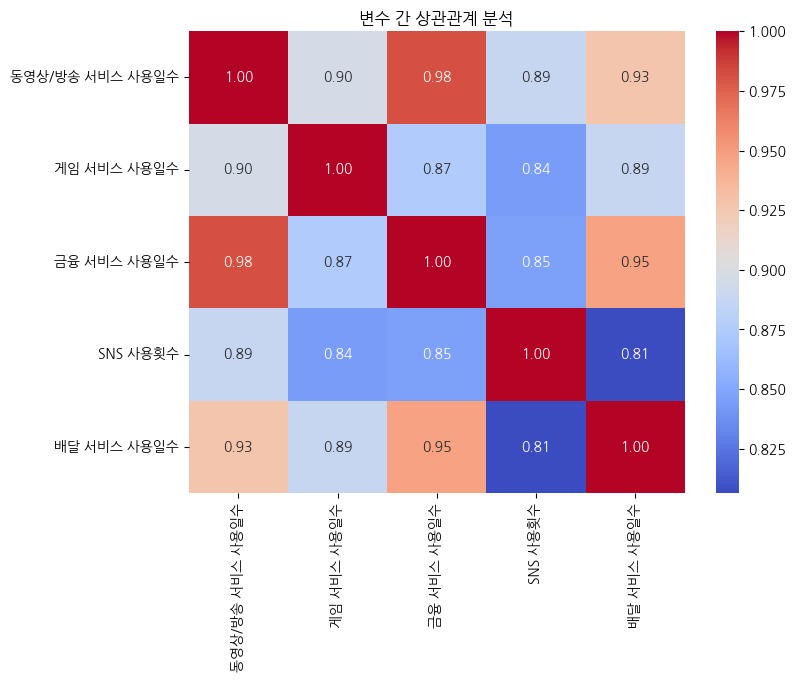

동영상/방송 서비스 사용일수 vs 배달_브랜드 사용일수 Pearson 상관계수: 0.34, P-value: 0.0000
게임 서비스 사용일수 vs 배달_브랜드 사용일수 Pearson 상관계수: 0.35, P-value: 0.0000
금융 서비스 사용일수 vs 배달_브랜드 사용일수 Pearson 상관계수: 0.32, P-value: 0.0000
SNS 사용횟수 vs 배달_브랜드 사용일수 Pearson 상관계수: 0.30, P-value: 0.0000
배달 서비스 사용일수 vs 배달_브랜드 사용일수 Pearson 상관계수: 0.31, P-value: 0.0000


In [70]:
# 상관계수 계산
corr_matrix = df_service[["동영상/방송 서비스 사용일수", "게임 서비스 사용일수", "금융 서비스 사용일수", "SNS 사용횟수", "배달 서비스 사용일수"]].corr()

# 데이터 시각화 - 상관행렬 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("변수 간 상관관계 분석")
plt.show()

# 변수별 상관계수 출력
for col in ["동영상/방송 서비스 사용일수", "게임 서비스 사용일수", "금융 서비스 사용일수", "SNS 사용횟수", "배달 서비스 사용일수"]:
  corr, p_value = pearsonr(df_service[col], df_service['배달_브랜드 서비스 사용일수'])
  print(f"{col} vs 배달_브랜드 사용일수 Pearson 상관계수: {corr:.2f}, P-value: {p_value:.4f}")

- **"게임 서비스 사용일수"**가 0.35로 가장 상관관계가 높음
- **"동영상/방송 서비스 사용일수"**(0.34)와 **"금융 서비스 사용일수"**(0.32)가 다음으로 높음
- 따라서, 가장 높은 위의 3가지 변수를 독립변수로 선정함

### **문제 2: 회귀 모델 구축**

상관분석을 통해 선정된 독립변수를 활용하여 배달 브랜드 서비스 사용일수를 예측하는 다중 회귀식을 작성하시오.

In [75]:
# 독립변수와 종속변수 분리
x = df_service[["동영상/방송 서비스 사용일수", "게임 서비스 사용일수", "금융 서비스 사용일수"]]
y = df_service["배달_브랜드 서비스 사용일수"]

model = LinearRegression()
model.fit(x, y)

predicted_service = model.predict(x)
r2 = r2_score(y, predicted_service)

coef_dict = {column: coef for column, coef in zip(x.columns, model.coef_)}

print(f"회귀식:\n배달 브랜드 서비스 사용일수 = {model.intercept_} + {model.coef_[0]:.3f} X 동영상/방송 서비스 사용일수 + {model.coef_[1]:.3f} X 게임 서비스 사용일수 + {model.coef_[2]:.3f} X 금융 서비스 사용일수")
print(f"결정계수(R^2) = {r2:.2f}")

회귀식:
배달 브랜드 서비스 사용일수 = 2.159650149558698 + 0.012 X 동영상/방송 서비스 사용일수 + 0.005 X 게임 서비스 사용일수 + -0.003 X 금융 서비스 사용일수
결정계수(R^2) = 0.13


### **문제 3: 회귀분석 결과 해석**

1. 회귀계수 ($ \beta_i$ )가 양수인 변수와 음수인 변수를 나누어 해석하시오.
  - 동영상/방송 & 게임 서비스 사용일수는 긍정적인 영향을 보인다.
    - 동영상/방송 서비스 사용 하루마다 0.012번 배달 브랜드 서비스를 이용하며,
     게임 서비스 사용 하루마다 0.005번 배달 브랜드 서비스를 이용하다고 에측 가능하다.
  - 금융 서비스 사용일수는 부정적인 영향을 보인다.
    - 금융 서비스를 하루 사용할 때마다 배달 브랜드 서비스가 0.003번 감소한다.
    
2. 회귀식의 결정계수 ($R^2$ ) 값을 확인하고, 모델의 설명력을 분석하시오.
    
  - 결정계수 값이 0.13으로 모델의 설명력이 상당히 낮은 것을 알 수 있다.
  - 올바른 데이터인지 다시 확인이 필요하며, 혹은 추가적인 변수를 고려해야 한다.
    
3. 독립변수 중 가장 영향력이 큰 변수를 찾고, 그 이유를 설명하시오.
  - "동영상/방송 서비스 사용일수"(0.012)의 회귀계수가 가장 높으므로, 가장 영향력이 크다고 할 수 있다.



---

### **상관분석 심화문제 1: 서비스 이용 패턴의 관계 분석**
배달 서비스 사용일수와 동영상/방송 서비스 사용일수는 서로 연관이 있을지 데이터셋을 활용하여 다음을 분석하시오.

### **문제 1: 상관관계 분석**

1. 배달 서비스 사용일수와 동영상/방송 서비스 사용일수 간의 **피어슨 상관계수**를 구하시오.
2. 상관계수 값이 양수인지 음수인지 확인하고, 그 의미를 해석하시오.

In [76]:
correlation, _ = pearsonr(df_service["배달 서비스 사용일수"], df_service["동영상/방송 서비스 사용일수"])
print("배달 서비스 vs 동영상/방송 서비스 Pearson 상관계수:", correlation)

배달 서비스 vs 동영상/방송 서비스 Pearson 상관계수: 0.9267731411670341


- 상관관계: 0.92
- 두 변수가 양의 상관관계를 갖고 있어, 한 변수가 증가하면 다른 변수도 증가한다.

### **문제 2: 심화 분석**
1. 배달 서비스 사용일수와 동영상/방송 서비스 사용일수의 4분위수(25%, 50%, 75%)와의 관계를 분석하여 패턴을 설명하시오.
2. 만약 상관관계가 높다면, 배달 서비스를 자주 이용하는 사람이 동영상/방송 서비스를 자주 이용하는 이유를 가설적으로 설명하시오.

In [79]:
# 변수별 상관계수 출력
for col in ["동영상/방송 서비스 사용일수: 4분위수, 25%", "동영상/방송 서비스 사용일수: 4분위수, 50%", "동영상/방송 서비스 사용일수: 4분위수, 75%"]:
  corr, p_value = pearsonr(df_service[col], df_service['배달 서비스 사용일수'])
  print(f"{col} vs 배달 서비스 사용일수 Pearson 상관계수: {corr:.2f}, P-value: {p_value:.4f}")

동영상/방송 서비스 사용일수: 4분위수, 25% vs 배달 서비스 사용일수 Pearson 상관계수: 0.94, P-value: 0.0000
동영상/방송 서비스 사용일수: 4분위수, 50% vs 배달 서비스 사용일수 Pearson 상관계수: 0.93, P-value: 0.0000
동영상/방송 서비스 사용일수: 4분위수, 75% vs 배달 서비스 사용일수 Pearson 상관계수: 0.90, P-value: 0.0000


- 모두 0.90 이상으로 상관관계가 높다.
- 배달 서비스를 많이 이용하는 사람들은 대부분 집에서 동영상/방송을 보면서 밥을 먹는 경우가 많기 때문이다.

### **상관분석 심화문제 2: 금융 서비스와 소비 행태의 연관성 분석**

금융 서비스 사용일수는 다른 온라인 서비스 이용 패턴과 어떤 관계가 있을지 금융 서비스 사용이 많은 사람이 특정 서비스(쇼핑, 배달, 동영상 등)를 더 많이 이용하는지 분석하시오.

### **문제 1: 금융 서비스와 기타 서비스의 관계 분석**

1. 금융 서비스 사용일수와 아래 서비스 사용일수 간의 **피어슨 상관계수**를 각각 구하고, 가장 높은 상관관계를 보이는 변수를 찾으시오.
    - 쇼핑 서비스 사용일수
    - 배달 서비스 사용일수
    - 동영상/방송 서비스 사용일수
2. 상관계수가 가장 높은 서비스와 금융 서비스 사용일수 간의 관계를 해석하고, 이 결과가 의미하는 바를 설명하시오.

In [81]:
# 변수별 상관계수 출력
for col in ["쇼핑 서비스 사용일수", "배달 서비스 사용일수", "동영상/방송 서비스 사용일수"]:
  corr, p_value = pearsonr(df_service[col], df_service['금융 서비스 사용일수'])
  print(f"{col} vs 금융 서비스 사용일수 Pearson 상관계수: {corr:.2f}, P-value: {p_value:.4f}")

쇼핑 서비스 사용일수 vs 금융 서비스 사용일수 Pearson 상관계수: 0.95, P-value: 0.0000
배달 서비스 사용일수 vs 금융 서비스 사용일수 Pearson 상관계수: 0.95, P-value: 0.0000
동영상/방송 서비스 사용일수 vs 금융 서비스 사용일수 Pearson 상관계수: 0.98, P-value: 0.0000


- "동영상/방송 서비스 사용일수"가 0.98로 가장 상관관계가 높다.

### **문제 2: 연령대와 금융 서비스 이용 관계 분석**

1. 연령대별로 금융 서비스 사용일수의 평균값을 구하고, 연령대에 따라 금융 서비스 사용 패턴이 어떻게 변하는지 설명하시오.
2. 특정 연령대에서 금융 서비스 이용이 많거나 적다면, 그 이유를 가설적으로 설명하시오.

In [80]:
avg_group = df_service.groupby("연령대")["금융 서비스 사용일수"].mean()

print("연령대별 금융 서비스 사용일수 (평균):\n", avg_group)

연령대별 금융 서비스 사용일수 (평균):
 연령대
20    168.818632
25    199.789505
30    215.498467
35    212.868986
40    208.078538
45    190.171344
50    164.574057
55    134.094104
60     98.035731
65     68.779009
70     46.307075
75     27.404835
Name: 금융 서비스 사용일수, dtype: float64


- 30 ~ 40대가 금융 서비스를 가장 많이 이용하는 것으로 나타난다.
  - 이는 해당 연령대가 재테크 및 금융 관리에 많은 관심이 있는 것을 알 수 있다.
- 60대 이후부터 금융 서비스 이용이 많이 낮아진다.
  - 이는 모바일 금융 서비스보다 직접 은행에 방문하여 금융 업무를 처리할 가능성이 있다.



---



### **1인 가구와 온라인 서비스 이용 행태의 관계**

**문제:** 1인 가구 비율이 높은 지역에서는 특정 온라인 서비스(배달, 금융, 쇼핑, 동영상 서비스 등)의 이용이 증가하는가?

**분석 방법:**

- 1인 가구 수와 주요 온라인 서비스 사용일수(배달, 쇼핑, 금융, 동영상/방송 서비스) 간의 피어슨 상관계수를 구한다.
- 1인 가구 비율이 높은 지역과 낮은 지역의 서비스 이용 패턴을 비교하여, 특정 서비스가 1인 가구에 의해 더 많이 사용되는지 분석한다.
- 연령대별 1인 가구 수와 서비스 이용의 관계를 추가 분석하여 특정 연령층에서 1인 가구의 영향이 더 두드러지는지 확인한다.

In [93]:
# 분석 대상 변수
single_household = "1인가구수"
services = ["배달 서비스 사용일수", "쇼핑 서비스 사용일수", "금융 서비스 사용일수", "동영상/방송 서비스 사용일수"]

# 숫자 데이터 변환 (쉼표 제거 및 공백 제거 후 숫자로 변환)
for col in [single_household] + services:
    df_service[col] = df_service[col].astype(str).str.replace(",", "").str.strip()
    df_service[col] = pd.to_numeric(df_service[col], errors='coerce')

# 1인 가구 수와 주요 온라인 서비스 사용일수 간의 피어슨 상관계수 계산
correlations = df_service[[single_household] + services].corr()[single_household].drop(single_household)

# 결과 출력
print("1인 가구 수와 온라인 서비스 이용 간의 피어슨 상관계수")
print(correlations)

1인 가구 수와 온라인 서비스 이용 간의 피어슨 상관계수
배달 서비스 사용일수        0.125722
쇼핑 서비스 사용일수       -0.033631
금융 서비스 사용일수        0.018672
동영상/방송 서비스 사용일수   -0.006732
Name: 1인가구수, dtype: float64




---



In [110]:
# 분석 대상 변수 설정
single_household = "1인가구수"
services = ["배달 서비스 사용일수", "쇼핑 서비스 사용일수", "금융 서비스 사용일수", "동영상/방송 서비스 사용일수"]
age_col = "연령대"

# 데이터 타입 변환 (쉼표 제거 후 숫자로 변환)
for col in [single_household] + services:
    df_service[col] = df_service[col].astype(str).str.replace(",", "").str.strip()
    df_service[col] = pd.to_numeric(df_service[col], errors='coerce')

# 1. 1인 가구 수와 주요 온라인 서비스 사용일수 간의 피어슨 상관계수 계산
correlations = df_service[[single_household] + services].corr()[single_household].drop(single_household)

# 2. 1인 가구 비율이 높은 지역과 낮은 지역의 서비스 이용 패턴 비교
q1 = df_service[single_household].quantile(0.25)  # 하위 25%
q3 = df_service[single_household].quantile(0.75)  # 상위 25%

high_single_df = df_service[df_service[single_household] >= q3]  # 1인 가구 비율이 높은 지역
low_single_df = df_service[df_service[single_household] <= q1]  # 1인 가구 비율이 낮은 지역

# 두 그룹의 서비스 이용 평균 비교
service_means_high = high_single_df[services].mean()
service_means_low = low_single_df[services].mean()

# 3. 연령대별 1인 가구 수와 서비스 이용 패턴 분석
if age_col in df.columns:
    age_single_service_means = df_service.groupby(age_col)[[single_household] + services].mean()
else:
    age_single_service_means = None

# 결과 출력
print("\n1. 1인 가구 수와 온라인 서비스 사용일수 간의 피어슨 상관계수")
print(correlations)

print("\n2. 1인 가구 비율이 높은 지역과 낮은 지역의 서비스 이용 평균 비교")
print("1인 가구 비율이 높은 지역 (상위 25%):")
print(service_means_high)
print("\n1인 가구 비율이 낮은 지역 (하위 25%):")
print(service_means_low)

print("\n3. 연령대별 1인 가구 수와 서비스 이용 평균")
print(age_single_service_means)


1. 1인 가구 수와 온라인 서비스 사용일수 간의 피어슨 상관계수
배달 서비스 사용일수        0.125722
쇼핑 서비스 사용일수       -0.033631
금융 서비스 사용일수        0.018672
동영상/방송 서비스 사용일수   -0.006732
Name: 1인가구수, dtype: float64

2. 1인 가구 비율이 높은 지역과 낮은 지역의 서비스 이용 평균 비교
1인 가구 비율이 높은 지역 (상위 25%):
배달 서비스 사용일수         11.951777
쇼핑 서비스 사용일수        184.766693
금융 서비스 사용일수        136.612886
동영상/방송 서비스 사용일수     64.139242
dtype: float64

1인 가구 비율이 낮은 지역 (하위 25%):
배달 서비스 사용일수         11.719843
쇼핑 서비스 사용일수        209.400313
금융 서비스 사용일수        153.588219
동영상/방송 서비스 사용일수     70.959804
dtype: float64

3. 연령대별 1인 가구 수와 서비스 이용 평균
None


### **연령대별 온라인 서비스 선호도의 차이**

**문제:** 연령대에 따라 선호하는 온라인 서비스(배달, 금융, 쇼핑, 게임, 동영상/방송 서비스 등)가 다르게 나타나는가?

**분석 방법:**

- 연령대별로 주요 온라인 서비스 사용일수의 평균값을 구하고, 서비스별 이용 경향을 비교한다.
- 연령대와 특정 서비스(예: 쇼핑 서비스 vs. 금융 서비스) 간의 상관관계를 분석하여, 나이가 많을수록 특정 서비스를 더 많이 이용하는지 또는 덜 이용하는지 확인한다.
- 특정 연령대에서 특정 서비스의 사용량이 다른 연령대에 비해 급격히 증가하거나 감소하는 패턴이 있는지 분석한다.

'연령대별 온라인 서비스 사용일수:'

,배달 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,게임 서비스 사용일수,동영상/방송 서비스 사용일수
연령대,,,,,
20,14.304599,168.818632,199.746580,60.962382,76.843986
25,17.008491,199.789505,242.349528,60.827005,86.508255
30,17.766745,215.498467,269.715330,59.670283,90.555542
35,17.048821,212.868986,282.706604,56.771462,89.056250
40,16.098821,208.078538,286.192925,55.220991,88.683137
45,14.244929,190.171344,265.624764,49.138090,82.454245
50,11.500236,164.574057,232.195283,39.601179,72.715920
55,8.739269,134.094104,196.902123,31.567099,64.116745
60,6.677123,98.035731,158.392689,25.729953,54.839269


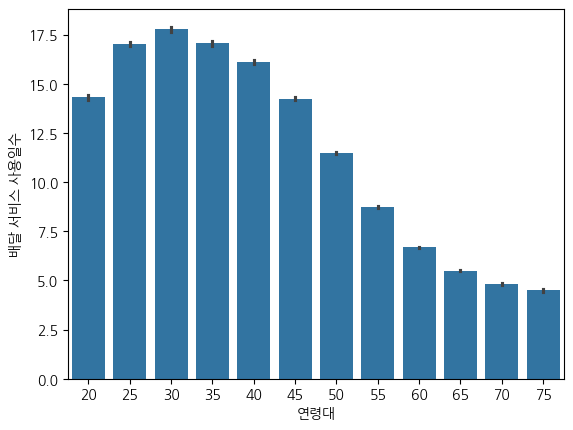

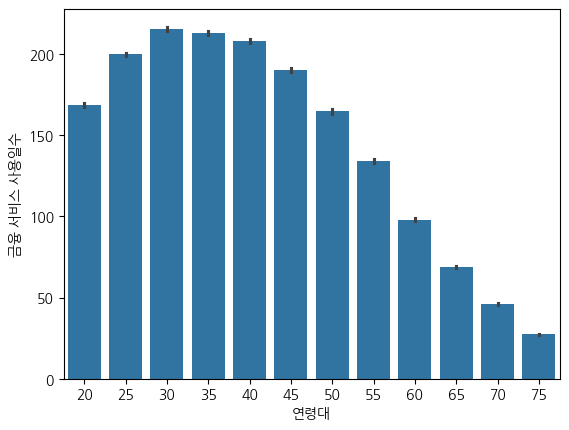

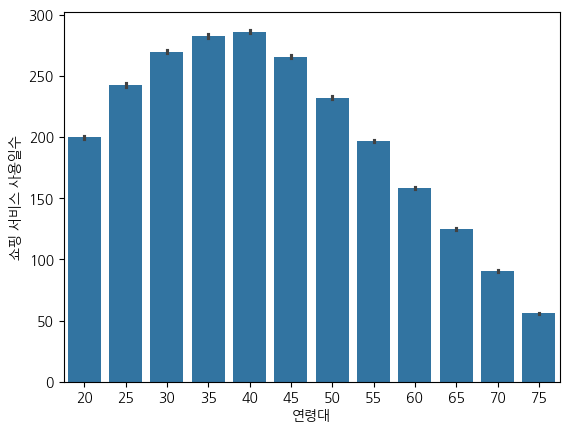

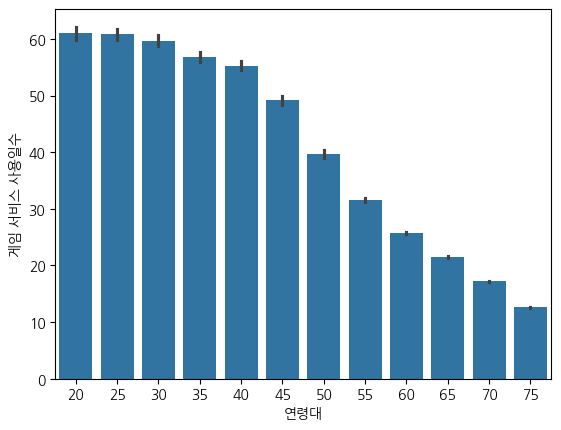

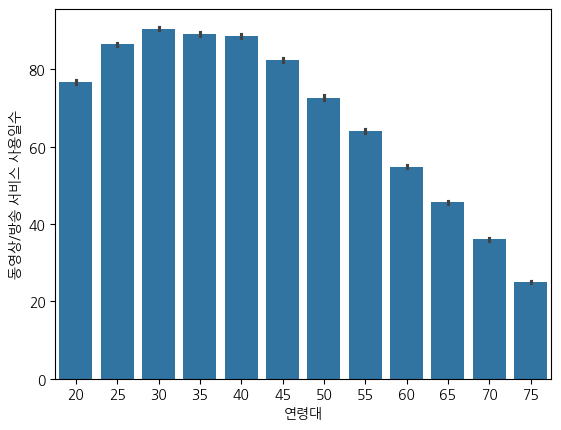

In [109]:
avg_group2 = df_service.groupby("연령대")[["배달 서비스 사용일수", "금융 서비스 사용일수", "쇼핑 서비스 사용일수", "게임 서비스 사용일수", "동영상/방송 서비스 사용일수"]].mean()
display("연령대별 온라인 서비스 사용일수:", avg_group2)

service_array = np.array(["배달 서비스 사용일수", "금융 서비스 사용일수", "쇼핑 서비스 사용일수", "게임 서비스 사용일수", "동영상/방송 서비스 사용일수"])
for col in service_array:
  sns.barplot(x = df_service["연령대"], y = df_service[col])
  plt.xlabel("연령대")
  plt.ylabel(col)
  plt.show()

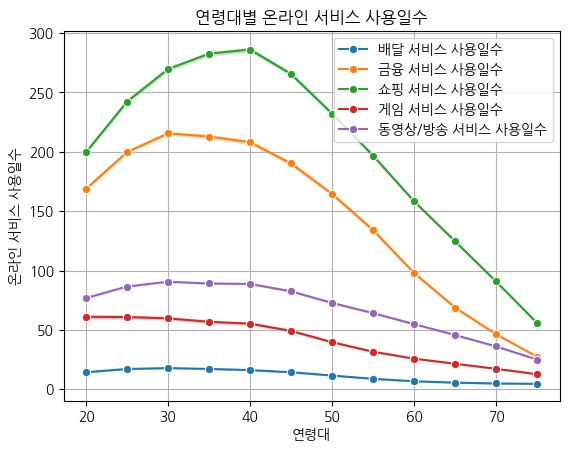

In [121]:
for col in service_array:
  sns.lineplot(x = df_service["연령대"], y = df_service[col], marker='o', label=col)
plt.title("연령대별 온라인 서비스 사용일수")
plt.xlabel("연령대")
plt.ylabel("온라인 서비스 사용일수")
plt.legend()
plt.grid(True)
plt.show()

- 배달 서비스는 20~30대의 이용이 가장 많고, 이후로 감소하는 추세이다.
- 금융 서비스는 20~30대까지 점차 증가하고, 40대부터는 감소한다.  
- 쇼핑 서비스에서는 40대까지 점차 증가, 40대에 가장 많이 이용하며 이후로는 감소한다.
- 게임 서비스에서는 20대가 가장 많이 이용하며 이후로 감소한다.
- 동영상/방송 서비스에서는 30대까지 점차 증가하며, 40대부터는 점차 감소한다.

In [111]:
# 변수별 상관계수 출력
for col in ["배달 서비스 사용일수", "금융 서비스 사용일수", "쇼핑 서비스 사용일수", "게임 서비스 사용일수", "동영상/방송 서비스 사용일수"]:
  corr, p_value = pearsonr(df_service[col], df_service['연령대'])
  print(f"{col} vs 연령대 Pearson 상관계수: {corr:.2f}, P-value: {p_value:.4f}")

배달 서비스 사용일수 vs 연령대 Pearson 상관계수: -0.89, P-value: 0.0000
금융 서비스 사용일수 vs 연령대 Pearson 상관계수: -0.86, P-value: 0.0000
쇼핑 서비스 사용일수 vs 연령대 Pearson 상관계수: -0.77, P-value: 0.0000
게임 서비스 사용일수 vs 연령대 Pearson 상관계수: -0.84, P-value: 0.0000
동영상/방송 서비스 사용일수 vs 연령대 Pearson 상관계수: -0.85, P-value: 0.0000


- 상관계수는 연령대 기준으로 대부분의 서비스에서 강한 음의 상관관계를 가진다.
- 즉, 나이가 많을수록 모든 온라인 서비스 이용이 줄어듦을 의미한다.

In [123]:
# 특정 연령대에서 특정 서비스 사용량이 급격히 증가하거나 감소하는 패턴 확인
age_service_differences = avg_group2.diff().dropna()  # 연령대별 변화량 계산

display("연령대별 서비스 이용 변화량:", age_service_differences)

'연령대별 서비스 이용 변화량:'

,배달 서비스 사용일수,금융 서비스 사용일수,쇼핑 서비스 사용일수,게임 서비스 사용일수,동영상/방송 서비스 사용일수
연령대,,,,,
25,2.703892,30.970873,42.602948,-0.135377,9.664269
30,0.758255,15.708962,27.365802,-1.156722,4.047288
35,-0.717925,-2.629481,12.991274,-2.898821,-1.499292
40,-0.950000,-4.790448,3.486321,-1.550472,-0.373113
45,-1.853892,-17.907193,-20.568160,-6.082901,-6.228892
50,-2.744693,-25.597288,-33.429481,-9.536910,-9.738325
55,-2.760967,-30.479953,-35.293160,-8.034080,-8.599175
60,-2.062146,-36.058373,-38.509434,-5.837146,-9.277476
65,-1.174646,-29.256722,-33.716274,-4.282075,-9.172995


##**분석 보고서 작성해보기 !**